In [186]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from keras import optimizers
import tensorflow as tf
from sklearn.metrics import r2_score,precision_score,roc_auc_score
from keras.callbacks import EarlyStopping

In [187]:
df=pd.read_csv(r"D:\data\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.columns
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0}) # zmieniamy wartości na Boolean
df.dropna # odrzucamy wiersze z wartościami NaN
df.shape

(1470, 35)

In [188]:
# zmienna określana Attrition
Y = df['Attrition'].values
#X = df.drop(['Attrition'], axis=1)
X = df.drop(['Attrition','StandardHours','Over18','EmployeeCount','YearsAtCompany','YearsInCurrentRole',
              'YearsSinceLastPromotion', 'YearsWithCurrManager','JobLevel','TotalWorkingYears','EmployeeNumber'], axis=1)

print(X.shape)

# sprwadzamy zbilansowanie zbioru
n_pos = (Y == 1).sum()
n_neg = (Y == 0).sum()

# not well balanced
print(f"Number of positive: {n_pos}, number of negative: {n_neg}")
df.describe()

(1470, 24)
Number of positive: 237, number of negative: 1233


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Old Shape:  (1470, 35)
New Shape:  (1458, 35)


<AxesSubplot: xlabel='MonthlyIncome'>

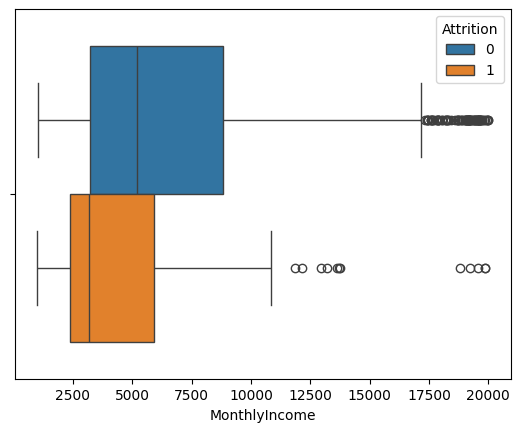

In [189]:
# IQR dla klasy 1
Q1 = np.percentile(df[df['Attrition'] == 1]['MonthlyIncome'], 25, interpolation='midpoint')
 
Q3 = np.percentile(df[df['Attrition'] == 1]['MonthlyIncome'], 75,
                interpolation = 'midpoint')

IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Górny przedział
upper = np.where(df[df['Attrition'] == 1]['MonthlyIncome'] >= (Q3+1.5*IQR))
 
# Dolny przedział
lower = np.where(df[df['Attrition'] == 1]['MonthlyIncome'] <= (Q1-1.5*IQR))
 
# Usuwamy wartości odstające
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)
 
sns.boxplot(x='MonthlyIncome',hue="Attrition", data=df)

Old Shape:  (1458, 35)
New Shape:  (1377, 35)


<AxesSubplot: xlabel='MonthlyIncome'>

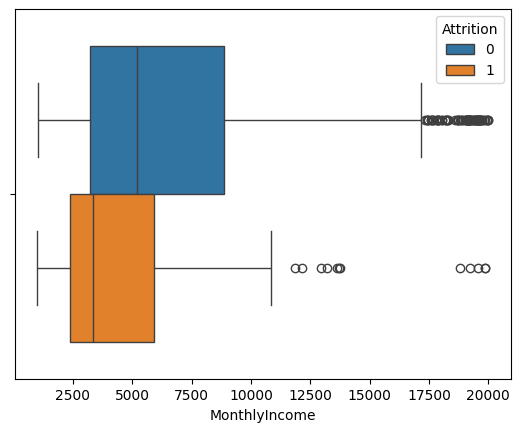

In [190]:
# IQR dla klasy 0

Q1 = np.percentile(df[df['Attrition'] == 0]['MonthlyIncome'], 25, interpolation='midpoint')
 
Q3 = np.percentile(df[df['Attrition'] == 0]['MonthlyIncome'], 75,
                interpolation = 'midpoint')

IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Górny przedział
upper = np.where(df[df['Attrition'] == 0]['MonthlyIncome'] >= (Q3+1.5*IQR))
 
# Dolny przedział
lower = np.where(df[df['Attrition'] == 0]['MonthlyIncome'] <= (Q1-1.5*IQR))
 
# Usuwamy wartości odstające
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)
 
sns.boxplot(x='MonthlyIncome',hue="Attrition", data=df)

In [191]:
from sklearn.model_selection import train_test_split
#podział na zbiór trenignowy i testowy
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [192]:
from sklearn.preprocessing import OneHotEncoder

#zamiana cech jakoścowych na n cech binarnych

def one_hot_encode(X_train, X_test):
    enc = OneHotEncoder(handle_unknown='ignore')

    
    X_train_enc = enc.fit_transform(X_train)

    # Transform the testing data using the same encoder
    X_test_enc = enc.transform(X_test)

    return X_train_enc, X_test_enc

X_train_enc,X_test_enc=one_hot_encode(X_train, X_test)
print(X_train_enc.shape)


(1102, 3079)


In [193]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(with_mean=False)
X_scaled_train=scaler.fit_transform(X_train_enc)
X_scaled_test=scaler.transform(X_test_enc)

In [194]:
from tensorboard.plugins.hparams import api as hp

In [195]:
HP_HIDDEN=hp.HParam('hidden_size',hp.Discrete([64,32,16]))
HP_EPOCHS=hp.HParam('epochs',hp.Discrete([100,200]))
HP_LEARNING_RATE=hp.HParam('learnign_rate',hp.RealInterval(0.01,0.4))

In [205]:
def train_test_model(hparamas,logdir):
    model=Sequential([
    Dense(units=hparamas[HP_HIDDEN],activation='relu'),
    Dense(units=1,activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(hparamas[HP_LEARNING_RATE]),metrics=['MeanSquaredError','AUC'])

    model.fit(X_scaled_train,Y_train,
              validation_data=(X_scaled_test,Y_test),
              epochs=hparamas[HP_EPOCHS],
              verbose=False,
              callbacks=[
                  tf.keras.callbacks.TensorBoard(logdir),
                  hp.KerasCallback(logdir,hparamas),
                  tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0,patience=20,verbose=0,mode='auto'),
              ])
    
    _, mse, *extra_return =model.evaluate(X_scaled_test,Y_test)
    
    
    pred=model.predict(X_scaled_test)[:,0]
    pred = pred.flatten()
    # treshold do określenie klasyfikacji
    pred = np.where(pred > 0.45, 1, 0)
    r2=r2_score(Y_test,pred)
    auc=roc_auc_score(Y_test,pred)

    return mse,r2,auc

In [206]:
def run(hparmas,logdir):
    with tf.summary.create_file_writer(logdir).as_default():
        hp.hparams_config(
            hparams=[HP_HIDDEN,HP_EPOCHS,HP_LEARNING_RATE,],
            metrics=[hp.Metric('AUC',display_name="AUC"),
                     hp.Metric('r2',display_name='r2'),
                     ])
        mse,r2,auc=train_test_model(hparmas,logdir)
        
        tf.summary.scalar('AUC', auc, step=1)
        tf.summary.scalar('r2',r2,step=1)

In [208]:
sesion_num=0
for hidden in HP_HIDDEN.domain.values:
    for epochs in HP_EPOCHS.domain.values:
        for learning_rate in tf.linspace(HP_LEARNING_RATE.domain.min_value,
                                         HP_LEARNING_RATE.domain.max_value,5):
            hparams={
                HP_HIDDEN:hidden,
                HP_EPOCHS:epochs,
                HP_LEARNING_RATE: float("%.2f"%float(learning_rate))
                }
            run_name="run-%d" %sesion_num
            print('---Próba: %s'%run_name)
            print({h.name:hparams[h] for h in hparams})
            run(hparams,'logs/hparam_tuning_2/'+run_name)
            sesion_num += 1

---Próba: run-0
{'hidden_size': 16, 'epochs': 100, 'learnign_rate': 0.01}
12/12 [==============================] - 0s 2ms/step
---Próba: run-1
{'hidden_size': 16, 'epochs': 100, 'learnign_rate': 0.11}


KeyboardInterrupt: 

tensorboard --logdir logss/hparam_tuning

tensorboard --logdir logss/hparam_tuning

In [199]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          64, activation='relu',
          input_shape=(X_scaled_train.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=0.01),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [200]:
model=make_model()


model.fit(X_scaled_train,Y_train,epochs=100,verbose=True)

In [204]:

pred=model.predict(X_scaled_test)[:,0]
pred = pred.flatten()
print(pred)


# treshold do określenie klasyfikacji
pred = np.where(pred > 0.5,1, 0)
print(pred)

print(r2_score(Y_test,pred))

class_0_precision = precision_score(Y_test, pred, pos_label=0)
class_1_precsion = precision_score(Y_test, pred, pos_label=1)
class_0_recall = recall_score(Y_test,pred,pos_label=0)
class_1_recall = recall_score(Y_test,pred,pos_label=1)


print(class_0_precision)
print(class_0_recall)
print("\n")
print(class_1_precsion)
print(class_1_recall)


 1/12 [=>............................] - ETA: 0s

12/12 [==============================] - 0s 1ms/step
[8.32069516e-01 1.38965305e-07 9.00048077e-01 3.75371284e-13
 1.84164406e-07 5.30471146e-01 1.30363583e-06 1.28323296e-02
 5.71014266e-03 3.34485281e-14 3.51613760e-02 1.25346222e-09
 9.31727648e-01 7.65379425e-03 6.08489931e-01 8.33647233e-03
 9.76506293e-01 3.62832526e-14 3.07296104e-05 9.14584763e-09
 8.05040240e-01 2.61043431e-04 8.19219708e-01 2.84195477e-20
 1.54399168e-04 1.19128865e-11 2.42598774e-10 6.37552798e-01
 8.75773283e-15 3.38877442e-08 4.04007826e-03 8.84420471e-04
 1.40217016e-04 1.72011619e-06 2.74874692e-05 1.03136495e-01
 3.24241846e-05 8.66787970e-01 6.02174774e-02 4.61528593e-10
 7.48154397e-16 8.18480015e-01 3.41569066e-05 1.42732600e-03
 1.00000000e+00 1.85532644e-12 9.89724815e-01 9.56082165e-01
 9.91714358e-01 9.67876673e-01 8.31332873e-05 1.34485541e-04
 4.18774085e-03 1.91573589e-03 8.91146192e-06 6.29831851e-01
 1.14768945e-07 5.16218543e-01 1.25394351e-19 1.78386439e-02
 5.11021535e-05 6.05732021e-05 1